In [95]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


os.makedirs("data", exist_ok=True)



# Plotly for interactive plots (optional)
import plotly.express as px

# Set default style
sns.set(style="whitegrid")

In [96]:
!pip install seaborn

In [97]:
!pip install plotly

In [98]:
# Load CSV files
orders = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_orders_dataset.csv')
customers = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_customers_dataset.csv')
order_items = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_order_items_dataset.csv')
payments = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_order_payments_dataset.csv')
products = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_products_dataset.csv')
sellers = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_sellers_dataset.csv')
reviews = pd.read_csv('C:/Users/surak/ecommerce-churn-analysis/data/olist_order_reviews_dataset.csv')

In [99]:
print("Orders shape:", orders.shape)
print("Customers shape:", customers.shape)
print("Order Items shape:", order_items.shape)
print("Payments shape:", payments.shape)

Orders shape: (99441, 8)
Customers shape: (99441, 5)
Order Items shape: (112650, 7)
Payments shape: (103886, 5)


In [100]:
# View a sample of the orders table
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [101]:
# Convert date columns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [102]:
# Merge customers with orders
customer_orders = pd.merge(orders, customers, on='customer_id', how='left')
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [103]:
# Get latest order date in dataset
max_date = customer_orders['order_purchase_timestamp'].max()

# Group by customer and get last order date
last_order = customer_orders.groupby('customer_unique_id')['order_purchase_timestamp'].max()

# Define churned customers as those whose last order was >90 days before max date
churn_threshold = max_date - pd.Timedelta(days=90)
churned_customers = last_order[last_order < churn_threshold].index

# Add churn label to customer_orders
customer_orders['churn'] = customer_orders['customer_unique_id'].isin(churned_customers).astype(int)


<Axes: xlabel='churn', ylabel='count'>

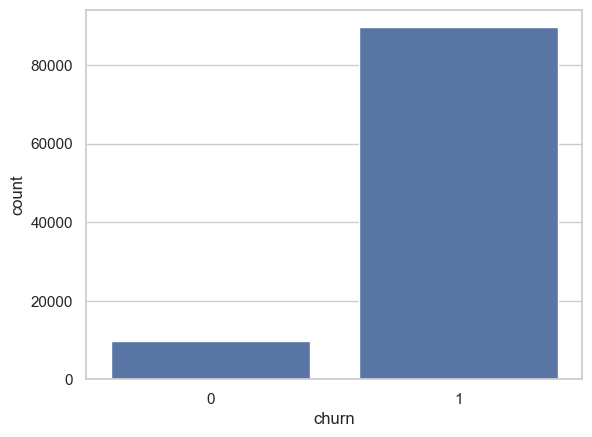

In [104]:
import seaborn as sns
sns.countplot(data=customer_orders, x='churn')

In [105]:
from datetime import timedelta

# Set reference date as the last purchase in the dataset
reference_date = orders['order_purchase_timestamp'].max()

# Merge orders with payments to get total amount spent
orders_with_payments = pd.merge(orders, payments, on='order_id', how='left')

# Merge with customers to get customer_unique_id
orders_with_customers = pd.merge(orders_with_payments, customers, on='customer_id', how='left')

# Calculate RFM
rfm = orders_with_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,   # Recency
    'order_id': 'count',                                                    # Frequency
    'payment_value': 'sum'                                                  # Monetary
}).reset_index()

rfm.to_csv("data/processed_rfm.csv", index=False)

# Rename columns
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Preview
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [106]:
# Get one churn value per customer
churn_labels = customer_orders[['customer_unique_id', 'churn']].drop_duplicates()

# Merge RFM with churn
rfm = pd.merge(rfm, churn_labels, on='customer_unique_id', how='left')

# Preview
rfm.head()


,customer_unique_id,recency,frequency,monetary,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,1


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = rfm[['recency', 'frequency', 'monetary']]
y = rfm['churn']

# Handle missing or infinite values
X = X.fillna(0)
X = X.replace([np.inf, -np.inf], 0)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [108]:
!pip install scikit-learn

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
print("📘 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

📘 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2300
           1       1.00      1.00      1.00     21724

    accuracy                           1.00     24024
   macro avg       0.99      1.00      0.99     24024
weighted avg       1.00      1.00      1.00     24024



In [110]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🌳 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

🌳 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2300
           1       1.00      1.00      1.00     21724

    accuracy                           1.00     24024
   macro avg       1.00      1.00      1.00     24024
weighted avg       1.00      1.00      1.00     24024



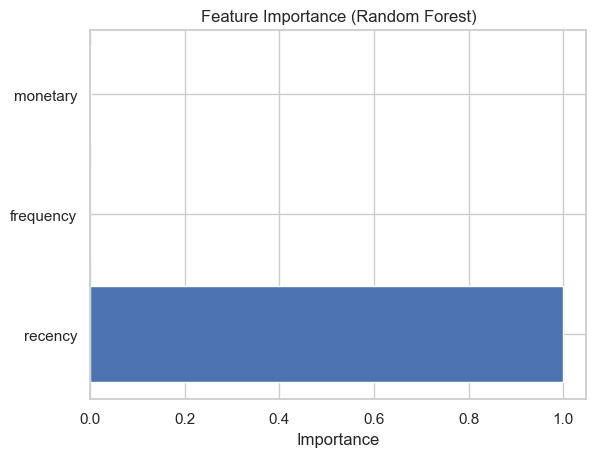

In [111]:
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_
features = ['recency', 'frequency', 'monetary']

# Plot
plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()